In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_csv("train.csv")
df.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING


In [3]:
df['Activity'].value_counts()

LAYING                1407
STANDING              1374
SITTING               1286
WALKING               1226
WALKING_UPSTAIRS      1073
WALKING_DOWNSTAIRS     986
Name: Activity, dtype: int64

In [4]:
df.shape

(7352, 563)

In [5]:
X = df.drop("Activity", axis=1)
y = df['Activity']

In [6]:
le = LabelEncoder()
y = le.fit_transform(y)

In [7]:
X_train,X_test, y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape)
print(X_test.shape)

(5881, 562)
(1471, 562)


In [8]:
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.982324949014276


C:\Users\ASUS\miniconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## 1. Removing Duplicate Columns

In [9]:
def duplicate_columns(df):
    duplicate_column = {}
    seen_column = {}
    
    for column in df.columns:
        current_column = df[column]
        
        try:
            current_column_hash = current_column.values.tobytes()
        except AttributeError:
            current_column_hash = current_column.to_string().encode()
        if current_column_hash in seen_column:
            if seen_column[current_column_hash] in duplicate_column:
                duplicate_column[seen_column[current_column_hash]].append(column)
            else:
                duplicate_column[seen_column[current_column_hash]] = [column]
        else:
            seen_column[current_column_hash] = column
            
    return duplicate_column

In [11]:
duplicate_column = duplicate_columns(X_train)

In [12]:
duplicate_column

{'tBodyAccMag-mean()': ['tBodyAccMag-sma()',
  'tGravityAccMag-mean()',
  'tGravityAccMag-sma()'],
 'tBodyAccMag-std()': ['tGravityAccMag-std()'],
 'tBodyAccMag-mad()': ['tGravityAccMag-mad()'],
 'tBodyAccMag-max()': ['tGravityAccMag-max()'],
 'tBodyAccMag-min()': ['tGravityAccMag-min()'],
 'tBodyAccMag-energy()': ['tGravityAccMag-energy()'],
 'tBodyAccMag-iqr()': ['tGravityAccMag-iqr()'],
 'tBodyAccMag-entropy()': ['tGravityAccMag-entropy()'],
 'tBodyAccMag-arCoeff()1': ['tGravityAccMag-arCoeff()1'],
 'tBodyAccMag-arCoeff()2': ['tGravityAccMag-arCoeff()2'],
 'tBodyAccMag-arCoeff()3': ['tGravityAccMag-arCoeff()3'],
 'tBodyAccMag-arCoeff()4': ['tGravityAccMag-arCoeff()4'],
 'tBodyAccJerkMag-mean()': ['tBodyAccJerkMag-sma()'],
 'tBodyGyroMag-mean()': ['tBodyGyroMag-sma()'],
 'tBodyGyroJerkMag-mean()': ['tBodyGyroJerkMag-sma()'],
 'fBodyAccMag-mean()': ['fBodyAccMag-sma()'],
 'fBodyBodyAccJerkMag-mean()': ['fBodyBodyAccJerkMag-sma()'],
 'fBodyBodyGyroMag-mean()': ['fBodyBodyGyroMag-sma()'

In [13]:
for one_list in duplicate_column.values():
    X_train.drop(columns=one_list, inplace=True)
    X_test.drop(columns=one_list, inplace=True)

In [14]:
print(X_train.shape)
print(X_test.shape)

(5881, 541)
(1471, 541)


## 2. Variance Threshold

In Variance Threshold we need to remove constant and quasi constant columns now understand how these column look like
- If we have columns 

                    A     B     C
                    1     1     Y
                    2     1     N
                    3     1     X
#### Constant
- Look at column B it has constant values which do not have any variance(spread) of data, that mean there is not variance in B to explain the variance in C
#### Quasi Constant
- Suppose in B column we have 1000 rows out of 1000, 995 rows are of 1 and other 5 are of 0  hence the variance of B is very close to 0, we can call this as quasi constant

So that we can use threshold value to remove this type of features

step 1: we put threshold of 0.1

step 2: we get variance of every features

step 3: we can check which variance value is less then the threshold value 

step 4: we drop all features which are less then the threshold value 

In [15]:
from sklearn.feature_selection import VarianceThreshold
vt = VarianceThreshold(threshold=0.05)
vt.fit(X_train)

VarianceThreshold(threshold=0.05)

In [16]:
sum(vt.get_support())

350

In [17]:
columns = X_train.columns[vt.get_support()]

In [18]:
X_train = vt.transform(X_train)
X_test = vt.transform(X_test)

X_train = pd.DataFrame(X_train, columns=columns)
X_test = pd.DataFrame(X_test, columns=columns)

In [19]:
print(X_train.shape)
print(X_test.shape)

(5881, 350)
(1471, 350)


## 3. Correlation(pearson corr coef)

<Axes: >

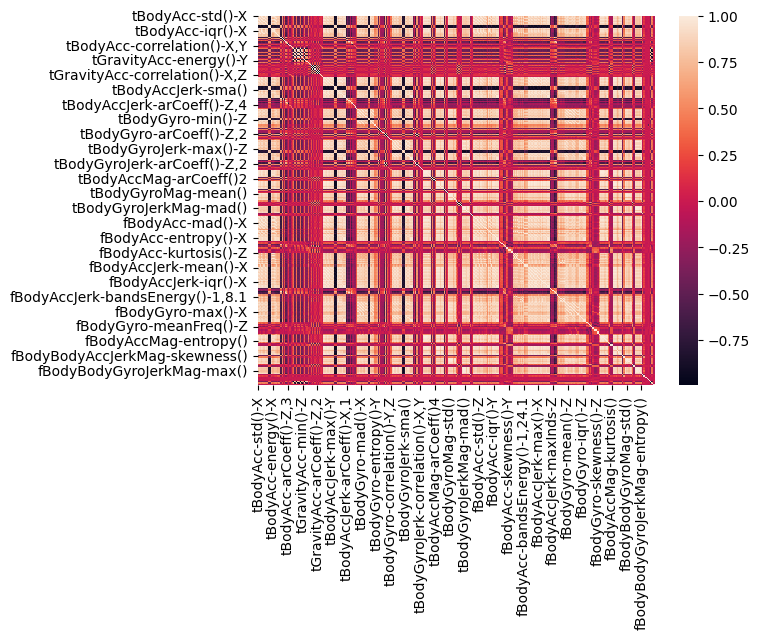

In [20]:
import seaborn as sns
sns.heatmap(X_train.corr())

In [21]:
corr_matrix = X_train.corr()

In [22]:
columns = corr_matrix.columns
columns_to_drop = []
for i in range(len(columns)):
    for j in range(i+1, len(columns)):
        if corr_matrix.loc[columns[i], columns[j]] > 0.95:
            columns_to_drop.append(columns[j])
print(len(columns_to_drop))

1508


In [23]:
columns_to_drop = set(columns_to_drop)

In [24]:
len(columns_to_drop)

197

In [25]:
X_train.drop(columns=columns_to_drop, axis=1, inplace=True)
X_test.drop(columns=columns_to_drop, axis=1, inplace=True)

In [26]:
print(X_train.shape)
print(X_test.shape)

(5881, 153)
(1471, 153)


## 4. Anova

- We basically use Anova when out input is numerical column and output is categorical column(more then 2 class is more effective)

- Also if we have numerical column in both the cases then also we can apply Anova

#### Technique to implement anova
    - In this technique we first take a input column then check the relation with output column Then if that relation is not strong we simply remove those columns

In [27]:
from sklearn.feature_selection import f_classif, SelectKBest
sel = SelectKBest(f_classif, k=100).fit(X_train, y_train)
X_train.columns[sel.get_support()]

Index(['tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z',
       'tBodyAcc-max()-Z', 'tBodyAcc-min()-X', 'tBodyAcc-min()-Y',
       'tBodyAcc-min()-Z', 'tBodyAcc-entropy()-X', 'tBodyAcc-entropy()-Y',
       'tBodyAcc-entropy()-Z', 'tBodyAcc-arCoeff()-X,1',
       'tBodyAcc-arCoeff()-X,2', 'tBodyAcc-arCoeff()-X,3',
       'tBodyAcc-arCoeff()-Y,1', 'tBodyAcc-arCoeff()-Z,1',
       'tBodyAcc-correlation()-X,Y', 'tBodyAcc-correlation()-Y,Z',
       'tGravityAcc-mean()-X', 'tGravityAcc-mean()-Y', 'tGravityAcc-mean()-Z',
       'tGravityAcc-sma()', 'tGravityAcc-energy()-Y', 'tGravityAcc-energy()-Z',
       'tGravityAcc-entropy()-X', 'tGravityAcc-entropy()-Y',
       'tGravityAcc-arCoeff()-Y,1', 'tGravityAcc-arCoeff()-Y,2',
       'tGravityAcc-arCoeff()-Z,1', 'tGravityAcc-arCoeff()-Z,2',
       'tGravityAcc-correlation()-Y,Z', 'tBodyAccJerk-std()-Z',
       'tBodyAccJerk-min()-X', 'tBodyAccJerk-min()-Y', 'tBodyAccJerk-min()-Z',
       'tBodyAccJerk-entropy()-X', 'tBodyAccJerk-arCoeff

In [28]:
columns = X_train.columns[sel.get_support()]

In [29]:
X_train = sel.transform(X_train)
X_test = sel.transform(X_test)

X_train = pd.DataFrame(X_train, columns=columns)
X_test = pd.DataFrame(X_test, columns=columns)

In [30]:
print(X_train.shape)
print(X_test.shape)

(5881, 100)
(1471, 100)


In [31]:
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.9700883752549286
